In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [46]:
def f(x):
    return x ** 2

def f_prime(x):
    return 2 * x

In [47]:
x = 10  # initial guess
r = 0.1  # learning rate
steps = 10  # number of iterations
log = []


In [48]:
def gradient_descent(start_x, learning_rate, steps):
    x = start_x
    history = []
    for t in range(steps):
        fx = f(x)
        history.append((t + 1, round(x, 4), round(fx, 4)))
        x -= learning_rate * f_prime(x)
    return history

In [49]:
learning_rates = [0.01, 0.1, 0.5]
all_runs = []
for r in learning_rates:
    results = gradient_descent(start_x=10, learning_rate=r, steps=10)
    df = pd.DataFrame(results, columns=["Step", "x", "f(x)"])
    df["Learning Rate"] = r
    all_runs.append(df)

# Combine all results into a single DataFrame
combined_df = pd.concat(all_runs, ignore_index=True)

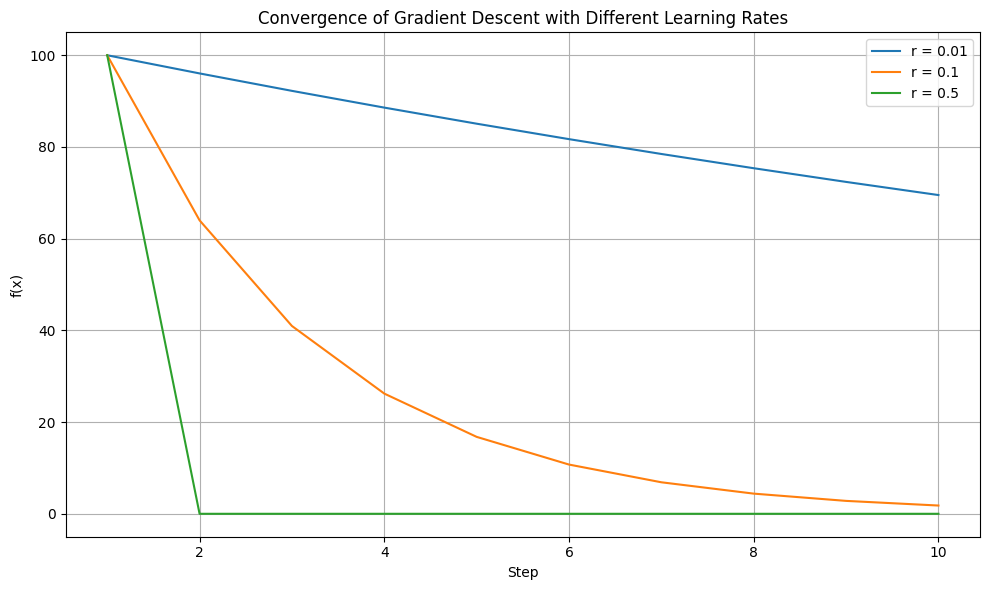

In [50]:
import matplotlib.pyplot as plt

# Plot convergence curves for different learning rates
plt.figure(figsize=(10, 6))

for r in learning_rates:
    subset = combined_df[combined_df["Learning Rate"] == r]
    plt.plot(subset["Step"], subset["f(x)"], label=f"r = {r}")

plt.xlabel("Step")
plt.ylabel("f(x)")
plt.title("Convergence of Gradient Descent with Different Learning Rates")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [52]:
summary = combined_df.groupby("Learning Rate").agg(
    Final_x=("x", lambda x: round(x.iloc[-1], 4)),
    Final_fx=("f(x)", lambda x: round(x.iloc[-1], 4))
).reset_index()
print("Performance Summary for Different Learning Rates:\n")
print(summary.to_string(index=False))

Performance Summary for Different Learning Rates:

 Learning Rate  Final_x  Final_fx
          0.01   8.3375   69.5135
          0.10   1.3422    1.8014
          0.50   0.0000    0.0000
